# Overview of this jupyter notebook

1. Loading screwing data 
2. Visualization of data (each class)
3. Checking dataframes
4. Saving data as pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tq
%matplotlib inline

In [2]:
import os
import json
import importlib
from library import etl_data as etl        # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc    # this module contains the color combination of FAPS Institute
print(importlib.reload(etl))
print(importlib.reload(fapsc))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\faps_color.py'>


## 1. Loading screwing data

In [3]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v2',
 '2_falsch_ausgerichtete_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_verunreinigtes_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [4]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [5]:
fnames = ["class0_", "class1_", "class2_", "class3_", "class4_", "class5_", "class6_", "class7_",]

In [6]:
def load_data(main_path, folders, fname, file_amount, downsample):
    
    arr = []
    len_curves = []
    short_curves = []
    low_curves = []
    
    for i in tq(range(file_amount)):
        file_path = os.path.join(main_path, folders, fname + str(i) + ".csv")
        data = pd.read_csv(file_path, encoding = 'ISO-8859-1')["Drehmoment(N·m)"]
        arr.append(data)
        len_curves.append(len(data))
        
    for index, length in enumerate(len_curves): 
        if length < np.max(len_curves)*0.8:
            short_curves.append(index)
        
    df = pd.concat(arr, axis=1, ignore_index=True)
    df = df[:][::downsample]
    df = df.reset_index(drop=True)
    df[df < 0] = np.nan
    df = df.fillna(0)
    
    for col in df:
        if max(df[col]) < 1.0:
            low_curves.append(col)
    
    return df, len_curves, short_curves, low_curves

In [7]:
df0, len_curves0, short_curves0, low_curves0 = load_data(main_path, folders[0], fnames[0], 800, downsample=20)
df1, len_curves1, short_curves1, low_curves1 = load_data(main_path, folders[1], fnames[1], 200, downsample=20)
df2, len_curves2, short_curves2, low_curves2 = load_data(main_path, folders[2], fnames[2], 200, downsample=20)
df3, len_curves3, short_curves3, low_curves3 = load_data(main_path, folders[3], fnames[3], 200, downsample=20)
df4, len_curves4, short_curves4, low_curves4 = load_data(main_path, folders[4], fnames[4], 200, downsample=20)
df5, len_curves5, short_curves5, low_curves5 = load_data(main_path, folders[5], fnames[5], 200, downsample=20)
df6, len_curves6, short_curves6, low_curves6 = load_data(main_path, folders[6], fnames[6], 200, downsample=20)
df7, len_curves7, short_curves7, low_curves7 = load_data(main_path, folders[7], fnames[7], 200, downsample=20)

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [8]:
len_curves = [len_curves0, len_curves1, len_curves2, len_curves3, len_curves4, len_curves5, len_curves6, len_curves7]
short_list = [short_curves0, short_curves1, short_curves2, short_curves3, short_curves4, short_curves5, short_curves6, short_curves7]
low_list = [low_curves0, low_curves1, low_curves2, low_curves3, low_curves4, low_curves5, low_curves6, low_curves7]

In [9]:
max_len_curves = []   # checking the maximum curve length of each class

for i in len_curves:
    max_len_curves.append(max(i))

print(max_len_curves)

[15497, 18601, 16229, 13932, 16046, 15314, 14846, 14949]


In [10]:
with open("dataframes/max_len_curves_single_class_v4.1", "w") as f:
    json.dump(max_len_curves, f)
f.close()

## 2. Visualization of data

In [11]:
def plot_df(df, color, label):

    plt.figure(figsize=(14,7), dpi=70)
    plt.plot(etl.set_time(df), df[df.columns], color=color)
    plt.plot([],[], color, label=label)

    plt.xlabel('Zeit in Sek', fontsize=16)
    plt.ylabel('Drehmoment in Nm', fontsize=16)
    plt.grid()
    plt.legend(loc='upper left', fontsize=16)
    plt.show()

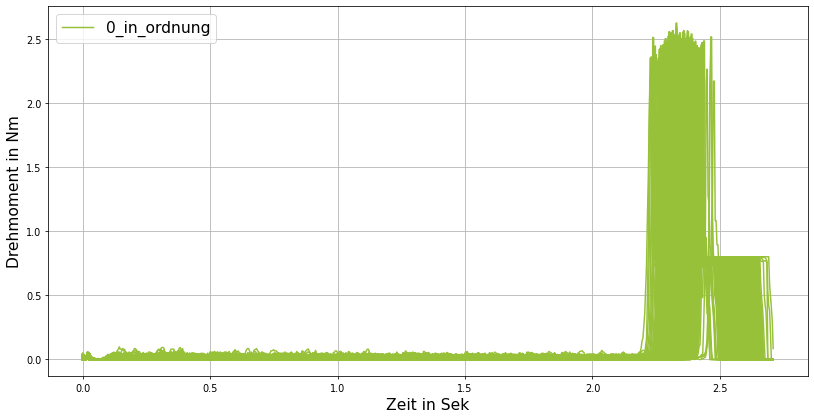

In [12]:
plot_df(df0, fapsc.green, classes[0])

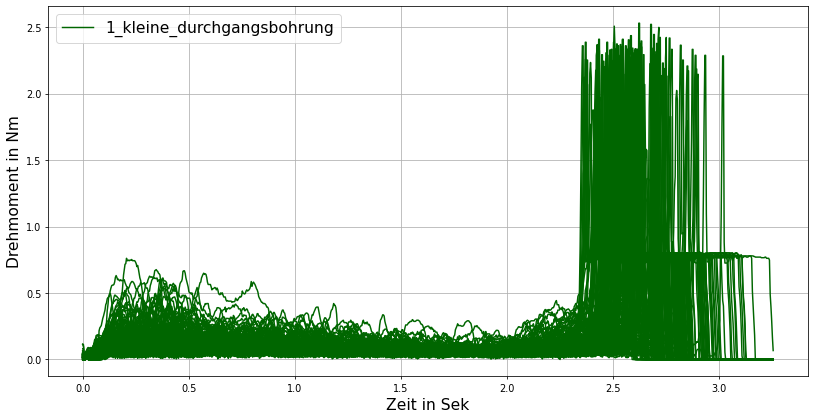

In [13]:
plot_df(df1, fapsc.dark_green, classes[1])

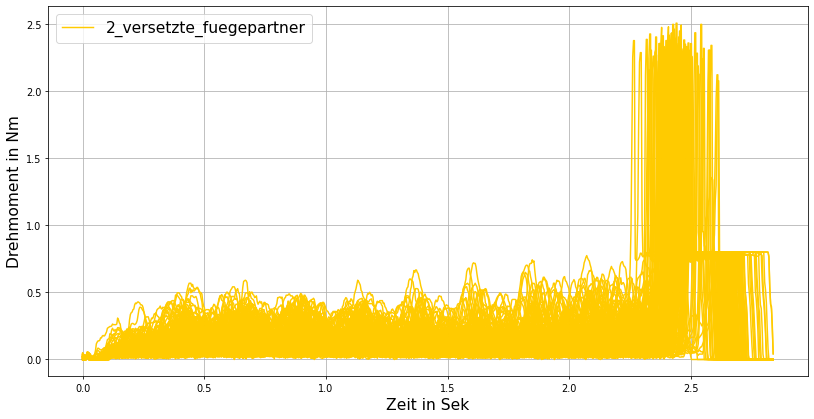

In [14]:
plot_df(df2, fapsc.yellow, classes[2])

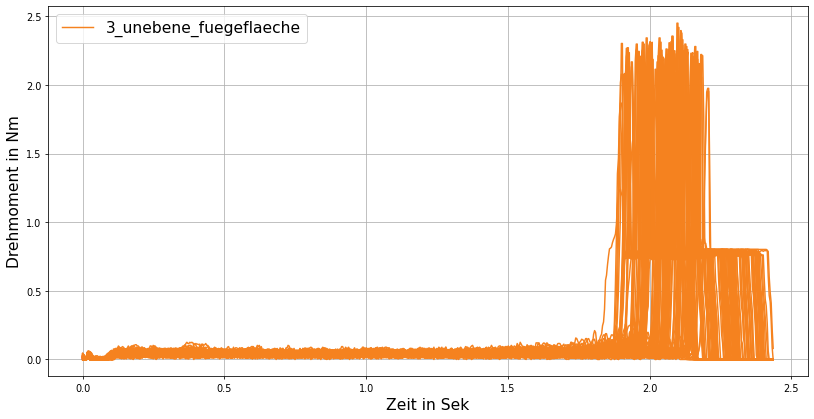

In [15]:
plot_df(df3, fapsc.orange, classes[3])

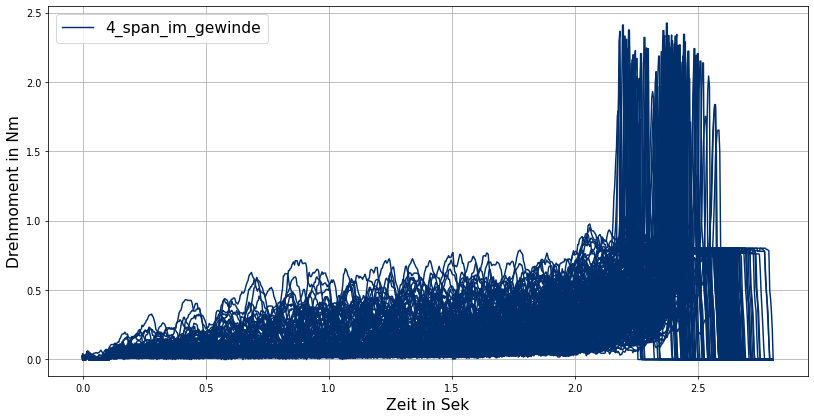

In [16]:
plot_df(df4, fapsc.blue, classes[4])

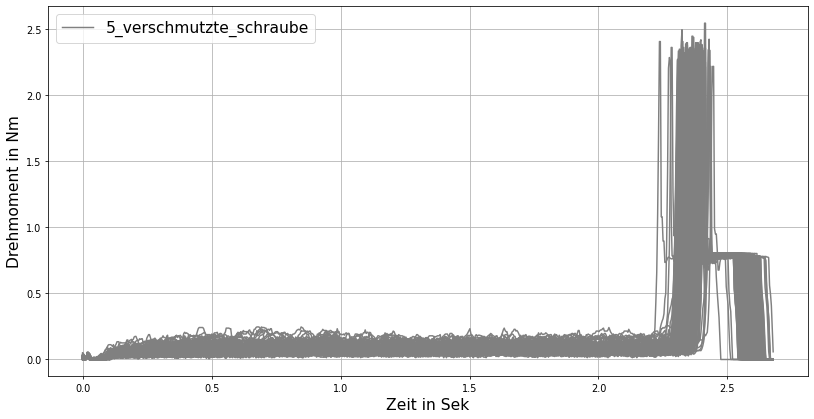

In [17]:
plot_df(df5, fapsc.grey_0, classes[5])

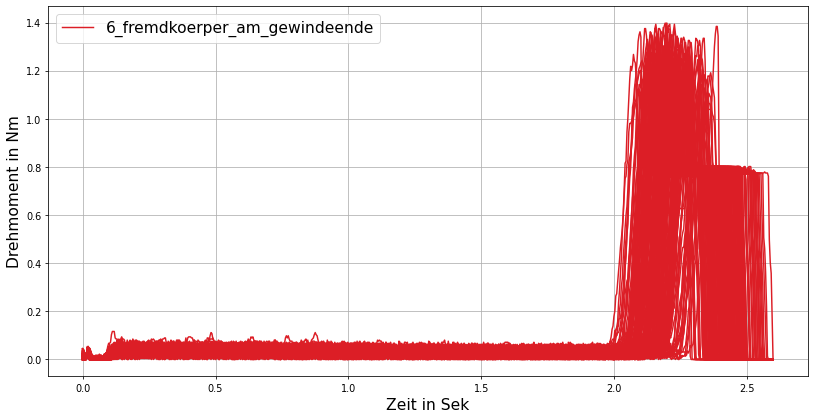

In [18]:
plot_df(df6, fapsc.red, classes[6])

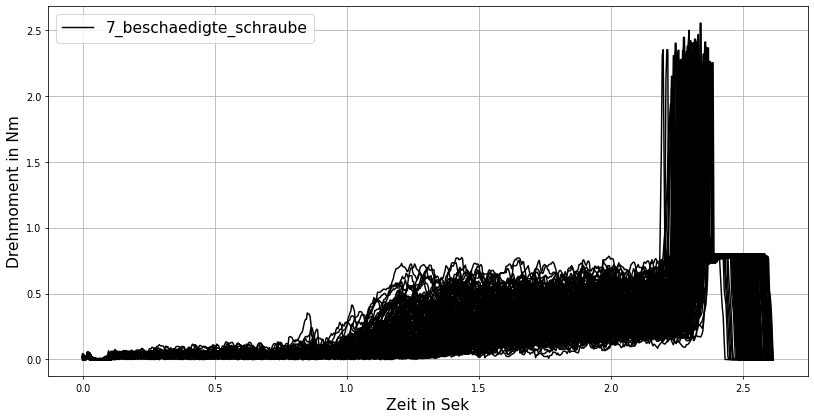

In [19]:
plot_df(df7, fapsc.black, classes[7])

## 3. checking dataframes

In [20]:
df0

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.38080,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20160,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [21]:
df1

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.04928,0.04480,0.03136,0.00448,0.04480,0.02240,0.01792,0.04032,0.00000,0.04928,...,0.01792,0.00000,0.02240,0.01792,0.02240,0.00000,0.02240,0.01792,0.01792,0.02240
1,0.04928,0.03584,0.03136,0.00448,0.04032,0.02240,0.01792,0.03136,0.00000,0.04928,...,0.01792,0.00000,0.02240,0.01792,0.01792,0.00000,0.02240,0.01792,0.01792,0.02240
2,0.01792,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.01792,0.00448,0.02688,...,0.00896,0.00896,0.02240,0.01344,0.00448,0.00448,0.02240,0.00448,0.00896,0.02240
3,0.00448,0.00448,0.00000,0.00000,0.01344,0.00000,0.00000,0.00896,0.00896,0.01344,...,0.00000,0.00896,0.00896,0.00448,0.00000,0.00000,0.00448,0.00000,0.00448,0.00448
4,0.01344,0.00896,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.01792,0.02688,...,0.00896,0.01344,0.02240,0.01344,0.00000,0.00448,0.01792,0.00448,0.01344,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
927,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
928,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
929,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [22]:
df2

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00000,0.00896,0.00000,0.02688,0.01792,0.01344,0.00000,0.01344,0.02240,0.00000,...,0.03584,0.00448,0.01344,0.00896,0.02240,0.03584,0.00896,0.02688,0.00000,0.01792
1,0.00000,0.00896,0.00000,0.02688,0.01792,0.01344,0.00000,0.01344,0.02240,0.00000,...,0.03136,0.00448,0.00896,0.00896,0.02240,0.02688,0.00896,0.02688,0.00000,0.01344
2,0.00448,0.01344,0.00896,0.01344,0.00896,0.00896,0.00000,0.01792,0.00448,0.00000,...,0.01792,0.02240,0.00448,0.00000,0.01792,0.01344,0.01344,0.02240,0.00448,0.00896
3,0.00896,0.00896,0.00896,0.00448,0.00448,0.00448,0.00448,0.00448,0.00000,0.00448,...,0.00448,0.00448,0.00000,0.00000,0.00896,0.00448,0.01344,0.00896,0.00448,0.00448
4,0.01344,0.01344,0.01344,0.01344,0.00896,0.00896,0.00896,0.01344,0.00448,0.00896,...,0.01344,0.01792,0.00448,0.00000,0.01792,0.01344,0.01792,0.02240,0.01344,0.00896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
808,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
809,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
810,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [23]:
df3

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01344,0.02688,0.01344,0.03136,0.00448,0.00896,0.00000,0.00000,0.01792,0.01792,...,0.02240,0.02688,0.00896,0.03136,0.02240,0.02688,0.02688,0.00896,0.01792,0.01344
1,0.01344,0.02688,0.01344,0.02688,0.00448,0.00896,0.00000,0.00000,0.01792,0.01344,...,0.02240,0.02240,0.00896,0.03136,0.02240,0.02688,0.02688,0.00896,0.01792,0.01344
2,0.00896,0.02240,0.01344,0.01344,0.00448,0.00000,0.00448,0.00448,0.01792,0.00448,...,0.01792,0.01344,0.00000,0.02240,0.00448,0.02240,0.02240,0.01344,0.01792,0.00448
3,0.00448,0.00448,0.00896,0.00000,0.00896,0.00000,0.00896,0.00896,0.01344,0.00000,...,0.01344,0.00000,0.00000,0.01344,0.00000,0.01792,0.01344,0.00896,0.00896,0.00000
4,0.00896,0.02240,0.01344,0.01344,0.01792,0.00448,0.01344,0.01344,0.01792,0.00896,...,0.01792,0.01344,0.00000,0.02240,0.00448,0.02240,0.02688,0.01344,0.01792,0.00448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.60032,0.00000,0.46592,0.00000,0.00000
693,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.48832,0.00000,0.42112,0.00000,0.00000
694,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.41216,0.00000,0.27776,0.00000,0.00000
695,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.21952,0.00000,0.08512,0.00000,0.00000


In [24]:
df4

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01792,0.01792,0.01344,0.02240,0.01792,0.0,0.01344,0.02688,0.01792,0.00896,...,0.02240,0.02240,0.01792,0.01792,0.02240,0.02688,0.01792,0.02240,0.02688,0.02688
1,0.01792,0.01344,0.00896,0.02240,0.01344,0.0,0.01344,0.02688,0.01792,0.00896,...,0.02240,0.02240,0.01792,0.01344,0.02240,0.02688,0.01792,0.01792,0.02688,0.02688
2,0.00896,0.00448,0.00448,0.01792,0.00896,0.0,0.00448,0.02240,0.01792,0.01344,...,0.01792,0.01792,0.00896,0.00448,0.02240,0.00896,0.02240,0.00896,0.00896,0.01344
3,0.00000,0.00000,0.00000,0.01344,0.00000,0.0,0.00000,0.00896,0.00896,0.00896,...,0.01792,0.00896,0.00448,0.00000,0.00896,0.00448,0.00896,0.00000,0.00448,0.00000
4,0.00896,0.00448,0.00000,0.01792,0.00896,0.0,0.00448,0.02240,0.01792,0.01792,...,0.02240,0.01792,0.00896,0.00448,0.02240,0.01344,0.02240,0.00896,0.00896,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49728
799,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.43456
800,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.34048
801,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.21056


In [25]:
df5

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00448,0.01792,0.00000,0.02240,0.02240,0.00448,0.03584,0.00000,0.01792,0.03136,...,0.00000,0.04032,0.00000,0.00448,0.01344,0.01344,0.01344,0.00448,0.03584,0.00000
1,0.00448,0.01792,0.00000,0.01792,0.01792,0.00448,0.03584,0.00000,0.01792,0.03136,...,0.00000,0.03584,0.00448,0.00448,0.01344,0.01344,0.01344,0.00000,0.03136,0.00000
2,0.01344,0.02240,0.00448,0.00448,0.00448,0.00000,0.01344,0.00448,0.00896,0.01344,...,0.00448,0.01344,0.00448,0.00896,0.01344,0.01792,0.01344,0.00448,0.01344,0.00448
3,0.00448,0.01344,0.00896,0.00448,0.00000,0.00000,0.00000,0.00448,0.00448,0.00448,...,0.00000,0.00896,0.00448,0.00896,0.00448,0.00896,0.00896,0.00000,0.00896,0.00448
4,0.01344,0.02240,0.01344,0.00448,0.00896,0.00448,0.00896,0.00448,0.00896,0.01344,...,0.00896,0.01344,0.01344,0.01344,0.01344,0.01792,0.01344,0.00448,0.01344,0.00896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.56000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17024,0.00000,0.00000,0.00000
762,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49728,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
763,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40768,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
764,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.23296,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [26]:
df6

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00896,0.02240,0.01792,0.02688,0.01792,0.00448,0.00896,0.01792,0.04032,0.01792,...,0.00896,0.02240,0.01344,0.01792,0.02240,0.00448,0.00000,0.00896,0.00896,0.02240
1,0.00896,0.02240,0.01792,0.02688,0.01792,0.00448,0.00896,0.01792,0.03584,0.01792,...,0.00896,0.01792,0.00896,0.01792,0.02240,0.00448,0.00000,0.00448,0.00896,0.02240
2,0.01344,0.02240,0.00896,0.01344,0.01344,0.00896,0.01344,0.00448,0.01344,0.00448,...,0.00448,0.00000,0.00000,0.01344,0.01344,0.00896,0.00000,0.00000,0.00000,0.00896
3,0.00448,0.00448,0.00448,0.00448,0.00896,0.00448,0.00448,0.00000,0.00896,0.00448,...,0.00000,0.00000,0.00000,0.00896,0.00448,0.00448,0.00000,0.00000,0.00000,0.00448
4,0.01344,0.02240,0.01344,0.00896,0.01344,0.01344,0.01344,0.00448,0.01344,0.00896,...,0.00448,0.00896,0.00000,0.01344,0.01344,0.00896,0.00448,0.00448,0.00000,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
739,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
740,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [27]:
df7

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01792,0.01792,0.02688,0.02240,0.01792,0.02688,0.01792,0.02688,0.01792,0.00000,...,0.00000,0.00000,0.01792,0.01792,0.00448,0.01344,0.00448,0.01792,0.00000,0.01792
1,0.01792,0.01792,0.02688,0.02240,0.01792,0.02688,0.01792,0.02688,0.01792,0.00000,...,0.00000,0.00000,0.01792,0.01344,0.00448,0.01344,0.00448,0.01792,0.00000,0.01792
2,0.01344,0.01792,0.00896,0.02240,0.01792,0.01344,0.01344,0.01344,0.01344,0.00448,...,0.00896,0.00896,0.00896,0.00448,0.00896,0.01792,0.00896,0.01792,0.00448,0.01792
3,0.00896,0.00896,0.00000,0.00448,0.00896,0.00448,0.00448,0.00000,0.00896,0.00896,...,0.00896,0.00896,0.00448,0.00000,0.00896,0.00896,0.01344,0.01344,0.01344,0.00896
4,0.01792,0.01792,0.00896,0.02240,0.01792,0.00896,0.00896,0.00896,0.01344,0.01792,...,0.01344,0.01792,0.00896,0.00448,0.01344,0.01792,0.01344,0.01792,0.01344,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
744,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
745,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
746,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## 4. Saving curves as dataframe

In [28]:
def save_df(df, name):
    
    df.to_pickle(f"dataframes/{name}.pkl")

    print(f"dataframe {name} is saved")

In [29]:
save_df(df0, "df0_v4.1")

dataframe df0_v4.1 is saved


In [30]:
save_df(df1, "df1_v4.1")

dataframe df1_v4.1 is saved


In [31]:
save_df(df2, "df2_v4.1")

dataframe df2_v4.1 is saved


In [32]:
save_df(df3, "df3_v4.1")

dataframe df3_v4.1 is saved


In [33]:
save_df(df4, "df4_v4.1")

dataframe df4_v4.1 is saved


In [34]:
save_df(df5, "df5_v4.1")

dataframe df5_v4.1 is saved


In [35]:
save_df(df6, "df6_v4.1")

dataframe df6_v4.1 is saved


In [36]:
save_df(df7, "df7_v4.1")

dataframe df7_v4.1 is saved
